In [1]:
import pandas as pd

In [2]:
# Loading the dataset

data = pd.read_csv('/content/Mall_Customers.csv')  

In [3]:
# Displaying top 5 rows of the dataset

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Displaying last 5 rows of the dataset
#(From these we will able to know total how many rows are available in our dataset)

data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# Finding the number of rows and coloumns in our dataset

print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 200
Number of columns 5


In [7]:
""" Getting Information About Our Dataset Like Total Number of Rows, Total Number of Columns, 
 Datatypes of Each Column And Memory Requirement"""

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Checking NULL values in the dataset

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

All above outputs are zero, that means we do not have any null values

In [9]:
# Getting overall statistics of the dataset

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Now we will execute Kmeans Clustering Algorithm

In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

In [12]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
from sklearn.cluster import KMeans

In [14]:
k_means = KMeans()
k_means.fit(x)

KMeans()

Thus we can see that Kmeans clustering algorithm is successfully trained on our data.

Now we will Identify the clusters:
To identify number of clusters we will use fit_predict method.

In [15]:
k_means = KMeans()
k_means.fit_predict(x)

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 7, 7,
       2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 3, 3, 7, 7, 7, 7,
       7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 6, 1, 6, 1,
       3, 1, 6, 1, 6, 1, 6, 1, 6, 1, 3, 1, 6, 1, 3, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 3, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

So now by default we have 8 cluster i.e 0 to 7.

To find the optimal number of clusters we will use elbow method.

In [16]:
# Elbow method to find number of clusters

wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters=i)
  k_means.fit(x)
  wcss.append(k_means.inertia_)


In [17]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30241.34361793658,
 25028.020475269415,
 21794.8856090982,
 19664.68519600554]

To visualize above wcss we will use matplotlib library.

In [18]:
import matplotlib.pyplot as plt

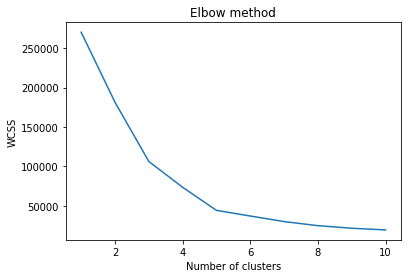

In [19]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

So from the above graph we can say that the optimal number of clusters are 5 because as we can see at first graph is decreasing strongly upto point 5 but after that it is decreasing slowly.

Model Training step: Now we will train Kmeans Clustering algorithm with optimal number of clusters.

In [20]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

In [21]:
k_means = KMeans(n_clusters = 5, random_state = 42)
y_means = k_means.fit_predict(x)

In [22]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

Now we can see that the customers are segmented into five clusters (0 to 4). So these five clusters contain different group of customers.

We will visualize these clusters on 2D plot:

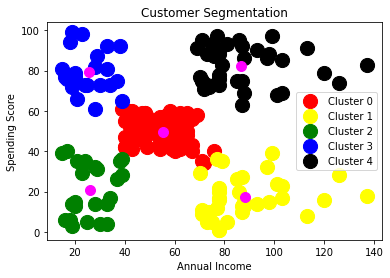

In [23]:
plt.scatter(x.iloc[y_means == 0,0], x.iloc[y_means == 0,1],s=200, c='red',label="Cluster 0")
plt.scatter(x.iloc[y_means == 1,0], x.iloc[y_means == 1,1],s=200, c='yellow',label="Cluster 1")
plt.scatter(x.iloc[y_means == 2,0], x.iloc[y_means == 2,1],s=200, c='green',label="Cluster 2")
plt.scatter(x.iloc[y_means == 3,0], x.iloc[y_means == 3,1],s=200, c='blue',label="Cluster 3")
plt.scatter(x.iloc[y_means == 4,0], x.iloc[y_means == 4,1],s=200, c='black',label="Cluster 4")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=100, c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

Cluster 0: Customers with medium Annual Income and medium annual spend.

Cluster 1: Customers with High Annual Income and Low annual spend.

Cluster 2: Customers with Low Annual Income and Low annual spend.

Cluster 3: Customers with Low Annual Income and High annual spend.

Cluster 4: Customers with High Annual Income and High annual spend.

According to these customer groups strategic team will decide for which product they have to target which customers.

Thus it is a good way for organizations to understand their customers for product growth and marketing.


Now we will perform prediction using Kmeans clustering algorithm.

In [24]:
k_means.predict([[15,39]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

So in the above example we have given Annual Income as 15 and Spending score as 39.

From this inputs we came to know that customer belongs to cluster 2 i.e customer with Low Annual Income and Low annual spend.